In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [69]:
data = pd.read_csv("/kaggle/input/titanic/train.csv") # test는 survived 열이 없어서 오류가 뜸 그치만 훈련 시키려면 survived가 필요함 어떻게 코딩해야하지?
data = data[['Survived', 'Age', 'Embarked']]

In [57]:
# Embarked를 숫자로 변환
data['Embarked'] = data['Embarked'].astype('category').cat.codes

In [58]:
# 죽은 사람 데이터 필터링 
dead_data = data[data['Survived'] == 0]
# 생존
alive_data = data[data['Survived'] == 1]

In [59]:
#**결측값을 중앙값으로 대체하고 싶었지만 pandas? 오류
#결측값이 몇개 없어서 제거하는 코드로 코딩
alive_data = alive_data.dropna()
dead_data = dead_data.dropna()

In [60]:
# people_data 생성
alive_people_data = [[a, e] for a, e in zip(alive_data['Age'], alive_data['Embarked'])]
dead_people_data = [[a, e] for a, e in zip(dead_data['Age'], dead_data['Embarked'])]

In [61]:
# 결과 출력
print("생존한 사람 데이터:")
print(alive_people_data)

print("\n죽은 사람 데이터:")
print(dead_people_data)
#잘 나옴

생존한 사람 데이터:
[[38.0, 0], [26.0, 2], [35.0, 2], [27.0, 2], [14.0, 0], [4.0, 2], [58.0, 2], [55.0, 2], [34.0, 2], [15.0, 1], [28.0, 2], [38.0, 2], [14.0, 0], [3.0, 0], [19.0, 1], [49.0, 0], [29.0, 2], [21.0, 2], [5.0, 2], [38.0, -1], [29.0, 2], [17.0, 2], [32.0, 2], [0.83, 2], [30.0, 2], [29.0, 2], [17.0, 2], [33.0, 2], [23.0, 2], [23.0, 0], [34.0, 2], [21.0, 2], [32.5, 2], [12.0, 0], [24.0, 2], [29.0, 2], [19.0, 2], [22.0, 2], [24.0, 2], [27.0, 2], [22.0, 2], [16.0, 1], [40.0, 2], [9.0, 2], [1.0, 2], [1.0, 2], [4.0, 2], [45.0, 2], [32.0, 2], [19.0, 2], [3.0, 2], [44.0, 0], [58.0, 0], [18.0, 2], [26.0, 0], [16.0, 1], [40.0, 0], [35.0, 2], [31.0, 0], [27.0, 2], [32.0, 0], [16.0, 2], [38.0, 2], [19.0, 2], [35.0, 2], [5.0, 2], [8.0, 2], [24.0, 2], [37.0, 2], [29.0, 0], [30.0, 2], [35.0, 0], [50.0, 2], [3.0, 2], [25.0, 2], [58.0, 2], [35.0, 2], [25.0, 2], [41.0, 2], [63.0, 2], [35.0, 2], [19.0, 2], [30.0, 2], [42.0, 2], [22.0, 1], [26.0, 2], [19.0, 0], [50.0, 0], [0.92, 2], [17.0, 0], [30.0, 

In [62]:
# 생존한 사람과 죽은 사람의 나이 데이터 합치기 list 사용
Age = list(alive_data['Age']) + list(dead_data['Age'])

# 생존한 사람과 죽은 사람의 항공소 데이터 합치기
Embarked = list(alive_data['Embarked']) + list(dead_data['Embarked'])


#**근데 굳이 저렇게 안 합쳐도 Age 랑 Embarked 원래 데이터 끌어오면 될 거 같은데 왜 안될까.. *해결 Age = data['Age']

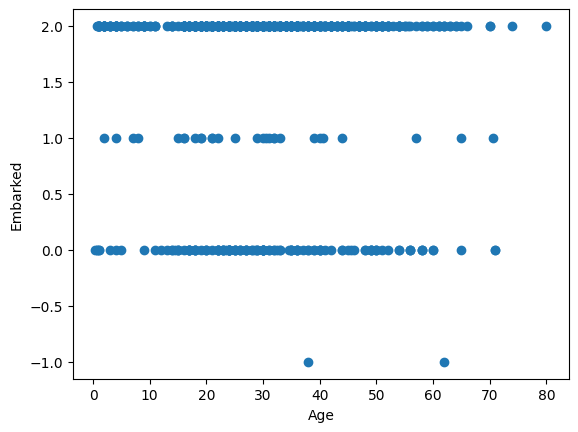

In [63]:
plt.scatter(Age, Embarked)
plt.xlabel('Age')
plt.ylabel('Embarked')
plt.show()


In [64]:
all_people_data = alive_people_data + dead_people_data

all_people_data = [[a, e] for a, e in zip(Age, Embarked)] #zip 대신 stack 써보기

#잘나옴all_people_data

In [65]:
# 생존자와 사망자의 개수 설정 **이코드는 왜 안될까 all_people_target = [1]*35 + [0]*14
num_alive = min(len(alive_people_data), 35)  # 생존자 수를 35로 제한
num_dead = min(len(dead_people_data), 14)    # 사망자 수를 14로 제한

# 모든 사람의 데이터 합치기
all_people_data = alive_people_data[:num_alive] + dead_people_data[:num_dead]

# 타겟 데이터 생성 (생존자: 1, 사망자: 0)
all_people_target = [1] * num_alive + [0] * num_dead

In [66]:
kn = KNeighborsClassifier()

kn.n_neighbors = 3

kn.fit(all_people_data, all_people_target)

KNeighborsClassifier(n_neighbors=3)

In [67]:
kn.score(all_people_data, all_people_target)

0.7551020408163265